In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# random forest

In [2]:
def read_digit_data(file_path):
    df = pd.read_csv(file_path, sep=' ', header=None)
    df.columns = ['n_trees', 'PCA_components', 'max_depth', 'precision', 'recall', 'f1-score']
    return df

df_rf_test = read_digit_data("digits_ensembles_rf_test.txt")
df_rf_test.head()

,n_trees,PCA_components,max_depth,precision,recall,f1-score
0,10,154,3,0.67,0.63,0.62
1,10,154,5,0.76,0.75,0.75
2,10,154,7,0.82,0.82,0.82
3,10,154,9,0.86,0.86,0.86
4,10,154,11,0.88,0.88,0.88


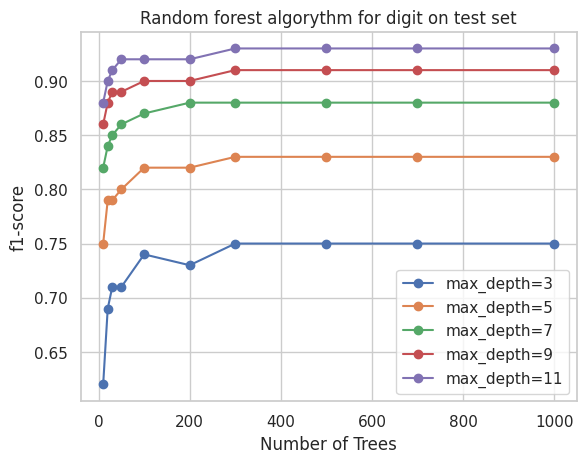

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digit_nr_of_ree_depth(df, title):
    sns.set(style="whitegrid")
    for max_depth in df['max_depth'].unique():
        subset_df = df[df['max_depth'] == max_depth]
        
        plt.plot(subset_df['n_trees'], subset_df['f1-score'], label=f'max_depth={max_depth}', marker='o')

    plt.xlabel('Number of Trees')
    plt.ylabel('f1-score')
    plt.title(title)

    plt.legend(title='Max Depth')
    plt.legend(loc='lower right')
    plt.show()

plot_digit_nr_of_ree_depth(df_rf_test, 'Random forest algorythm for digit on test set')


In [4]:
df_rf_train = read_digit_data("digits_ensembles_rf_train.txt")
df_rf_train.head()

,n_trees,PCA_components,max_depth,precision,recall,f1-score
0,10,154,3,0.66,0.62,0.61
1,10,154,5,0.76,0.75,0.75
2,10,154,7,0.83,0.83,0.83
3,10,154,9,0.88,0.88,0.88
4,10,154,11,0.93,0.93,0.93


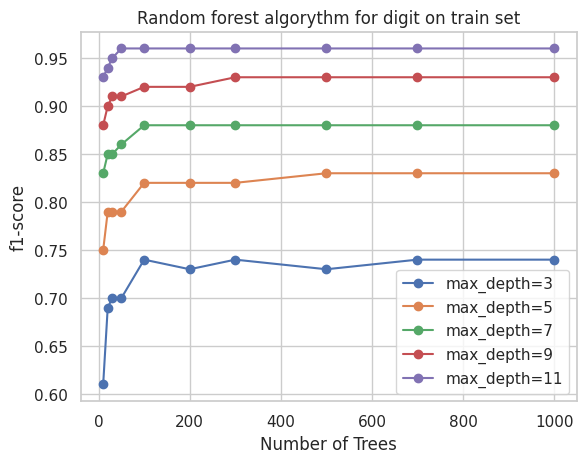

In [5]:
plot_digit_nr_of_ree_depth(df_rf_train, 'Random forest algorythm for digit on train set')



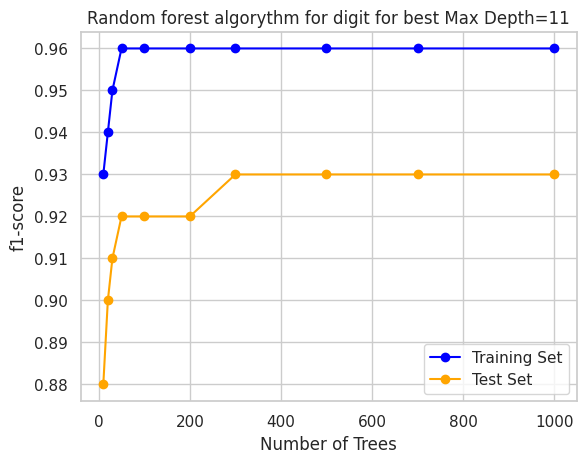

In [6]:
def plot_test_vs_train_digit(df_test, df_train, title, max_depth_value=11):
    train_subset = df_train[df_train["max_depth"] == max_depth_value][["n_trees", "f1-score"]]
    test_subset = df_test[df_test["max_depth"] == max_depth_value][["n_trees", "f1-score"]]

    plt.plot(train_subset["n_trees"], train_subset["f1-score"], label='Training Set', marker='o', color='blue')

    plt.plot(test_subset["n_trees"], test_subset["f1-score"], label='Test Set', marker='o', color='orange')

    plt.xlabel('Number of Trees')
    plt.ylabel('f1-score')
    plt.title(title + str(max_depth_value))

    plt.legend()
    plt.show()

plot_test_vs_train_digit(df_rf_test, df_rf_train, 'Random forest algorythm for digit for best Max Depth=')


In [7]:
def read_uc13_data(path):
    df = pd.read_csv(path, sep=' ', header=None)
    df.columns = ['patient_id', 'PCA_components', 'binary_or_multiclass', 'n_trees',  'max_depth', 'precision', 'recall', 'f1-score']
    return df

df_uc13_test = read_uc13_data('uc13_ensembles_rf_test.txt')
df_uc13_test.head()

,patient_id,PCA_components,binary_or_multiclass,n_trees,max_depth,precision,recall,f1-score
0,chb01,pca136,binary,100,3,0.5,0.5,0.5
1,chb01,pca136,binary,100,5,0.5,0.5,0.5
2,chb01,pca136,binary,100,7,0.5,0.5,0.5
3,chb01,pca136,binary,100,9,0.5,0.5,0.5
4,chb01,pca136,binary,100,11,0.5,0.5,0.5


In [8]:
df_uc13_train = read_uc13_data('uc13_ensembles_rf_train.txt')
df_uc13_train.head()

,patient_id,PCA_components,binary_or_multiclass,n_trees,max_depth,precision,recall,f1-score
0,chb01,pca136,binary,100,3,0.5,0.50,0.50
1,chb01,pca136,binary,100,5,1.0,0.73,0.81
2,chb01,pca136,binary,100,7,1.0,0.89,0.93
3,chb01,pca136,binary,100,9,1.0,0.98,0.99
4,chb01,pca136,binary,100,11,1.0,0.99,1.00


In [9]:
df_uc13_test["PCA_components"].value_counts()

PCA_components
pca136    1260
Name: count, dtype: int64

In [10]:
df_uc13_test["binary_or_multiclass"].value_counts()

binary_or_multiclass
binary        630
multiclass    630
Name: count, dtype: int64

In [11]:
df_uc13_test["n_trees"].value_counts()

n_trees
100     210
200     210
300     210
500     210
700     210
1000    210
Name: count, dtype: int64

In [12]:
df_uc13_test["max_depth"].value_counts()

max_depth
3     252
5     252
7     252
9     252
11    252
Name: count, dtype: int64

In [13]:
def split_to_binary_and_mult(df):
    return df[df["binary_or_multiclass"]=='binary'], df[df["binary_or_multiclass"]=='multiclass']

df_uc13_train_binary, df_uc13_train_multiclass=split_to_binary_and_mult(df_uc13_train)
df_uc13_test_binary, df_uc13_test_multiclass=split_to_binary_and_mult(df_uc13_test)

In [14]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

average_df = df_uc13_train_binary.groupby(['n_trees', 'max_depth'], as_index=False)['f1-score'].mean()

n_trees = np.unique(average_df['n_trees'])
max_depth = np.unique(average_df['max_depth'])
n_trees, max_depth = np.meshgrid(n_trees, max_depth)
                       
Z = griddata((average_df['n_trees'], average_df['max_depth']), average_df['f1-score'],(n_trees, max_depth), method='cubic')


fig = go.Figure(go.Surface(x=n_trees,y=max_depth,z=Z))

fig.update_layout(scene=dict(
                    xaxis_title='Number of Trees',
                    yaxis_title='Max Depth',
                    zaxis_title='Average F1-Score'),
                    scene_camera=dict(up=dict(x=0, y=0, z=1),
                    center=dict(x=0, y=0, z=0),
                    eye=dict(x=1.25, y=1.25, z=1.25)))

# Set the title
fig.update_layout(title='Random forest algorythm for uc13 binary classification on train set for avarge f-score for all patients')

fig.show()

In [15]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import griddata

def plot_uc13_3d_n_trees_max_depth_avg_f1_score(df, title):
    average_df = df.groupby(['n_trees', 'max_depth'], as_index=False)['f1-score'].mean()

    n_trees = np.unique(average_df['n_trees'])
    max_depth = np.unique(average_df['max_depth'])
    n_trees, max_depth = np.meshgrid(n_trees, max_depth)
                        
    Z = griddata((average_df['n_trees'], average_df['max_depth']), average_df['f1-score'],(n_trees, max_depth), method='cubic')


    fig = go.Figure(go.Surface(x=n_trees,y=max_depth,z=Z))

    fig.update_layout(scene=dict(
                        xaxis_title='Number of Trees',
                        yaxis_title='Max Depth',
                        zaxis_title='Average F1-Score'),
                        scene_camera=dict(up=dict(x=0, y=0, z=1),
                        center=dict(x=0, y=0, z=0),
                        eye=dict(x=1.25, y=1.25, z=1.25)))

    fig.update_layout(title=title)
    fig.show()

plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_train_multiclass, 'Random forest algorythm for uc13 multi classification on train set for avarge f-score for all patients')


In [16]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_test_binary, 'Random forest algorythm for uc13 binary classification on test set for avarge f-score for all patients')


In [17]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_test_multiclass, 'Random forest algorythm for uc13 multi classification on test set for avarge f-score for all patients')


# extra randomized trees

In [18]:
df_ert_test = read_digit_data("digits_ensembles_ert_test.txt")
df_ert_test.head()

,n_trees,PCA_components,max_depth,precision,recall,f1-score
0,10,154,3,0.48,0.43,0.39
1,10,154,5,0.60,0.56,0.56
2,10,154,7,0.71,0.70,0.70
3,10,154,9,0.78,0.77,0.77
4,10,154,11,0.80,0.79,0.79


In [19]:
df_ert_train = read_digit_data("digits_ensembles_ert_train.txt")
df_ert_train.head()

,n_trees,PCA_components,max_depth,precision,recall,f1-score
0,10,154,3,0.47,0.42,0.39
1,10,154,5,0.59,0.56,0.55
2,10,154,7,0.72,0.71,0.70
3,10,154,9,0.81,0.80,0.80
4,10,154,11,0.86,0.85,0.85


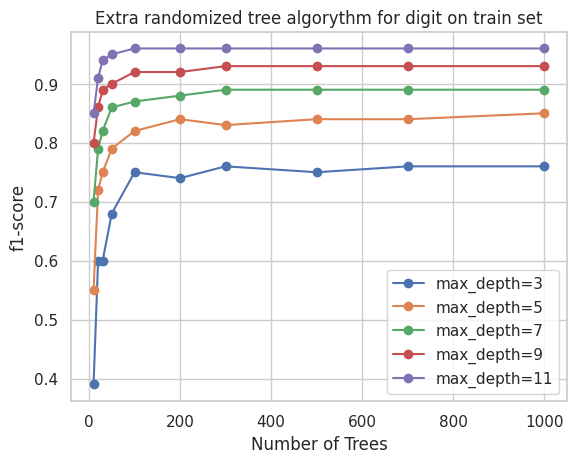

In [20]:
plot_digit_nr_of_ree_depth(df_ert_train, 'Extra randomized tree algorythm for digit on train set')


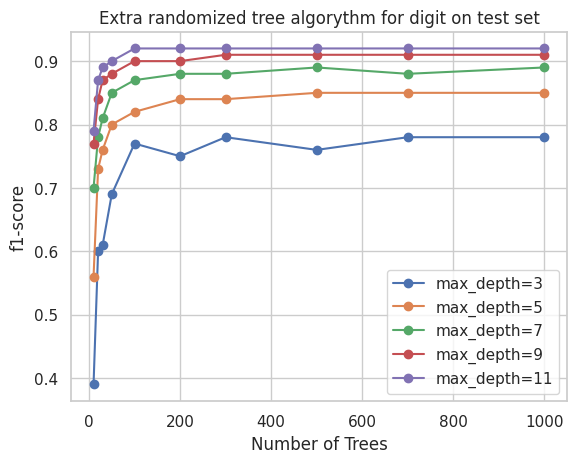

In [21]:
plot_digit_nr_of_ree_depth(df_ert_test, 'Extra randomized tree algorythm for digit on test set')


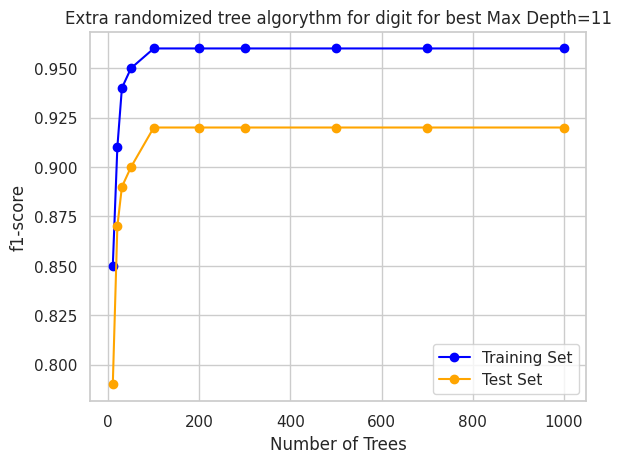

In [22]:
plot_test_vs_train_digit(df_ert_test, df_ert_train, 'Extra randomized tree algorythm for digit for best Max Depth=')


In [23]:
df_uc13_ert_train = read_uc13_data('uc13_ensembles_ert_train.txt')
df_uc13_ert_test = read_uc13_data('uc13_ensembles_ert_test.txt')

df_uc13_ert_train_binary, df_uc13_ert_train_multiclass=split_to_binary_and_mult(df_uc13_ert_train)
df_uc13_ert_test_binary, df_uc13_ert_test_multiclass=split_to_binary_and_mult(df_uc13_ert_test)

In [24]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_ert_train_binary, 'Extra randomized tree algorythm for uc13 binary classification on train set for avarge f-score for all patients')


In [25]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_ert_train_multiclass, 'Extra randomized tree algorythm for uc13 multi classification on train set for avarge f-score for all patients')


In [26]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_ert_test_binary, 'Extra randomized tree algorythm for uc13 binary classification on test set for avarge f-score for all patients')


In [27]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_ert_test_multiclass, 'df_uc13_ert_test_binary algorythm for uc13 multi classification on test set for avarge f-score for all patients')


# gbt WITHOUT regression and with x_vs_all (digits, no patients)

In [28]:
df_gbt_train = read_digit_data("digits_ensembles_gbt_WITHOUT_regression_with_x_vs_all_train.txt")
df_gbt_train.head()

,n_trees,PCA_components,max_depth,precision,recall,f1-score
0,10,154,3,0.74,0.72,0.72
1,10,154,5,0.84,0.83,0.83
2,10,154,7,0.90,0.90,0.90
3,10,154,9,0.97,0.97,0.97
4,10,154,11,0.99,0.99,0.99


In [29]:
df_gbt_test = read_digit_data("digits_ensembles_gbt_WITHOUT_regression_with_x_vs_all_test.txt")
df_gbt_test.head()

,n_trees,PCA_components,max_depth,precision,recall,f1-score
0,10,154,3,0.75,0.73,0.73
1,10,154,5,0.82,0.81,0.81
2,10,154,7,0.85,0.85,0.85
3,10,154,9,0.85,0.85,0.85
4,10,154,11,0.84,0.84,0.84


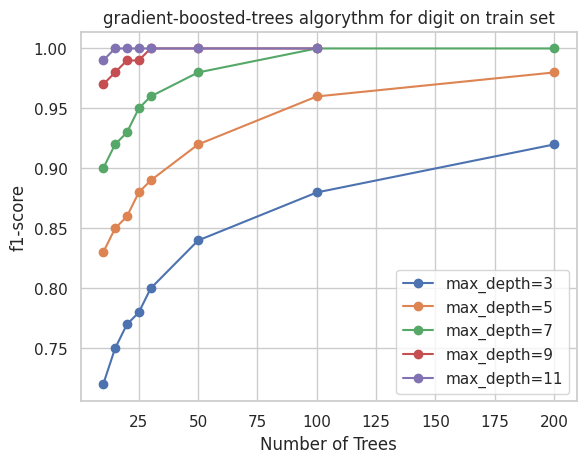

In [30]:
plot_digit_nr_of_ree_depth(df_gbt_train, 'gradient-boosted-trees algorythm for digit on train set')


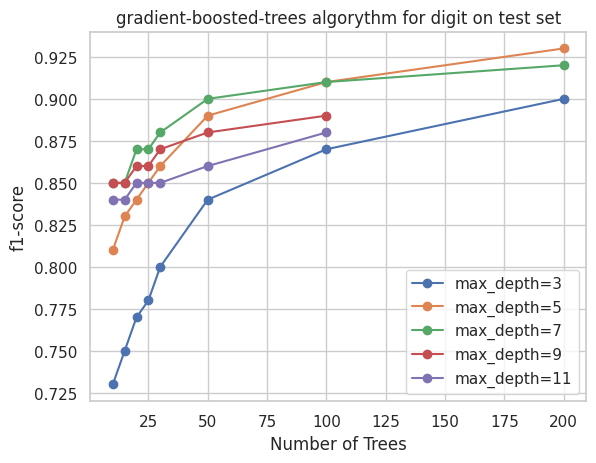

In [31]:
plot_digit_nr_of_ree_depth(df_gbt_test, 'gradient-boosted-trees algorythm for digit on test set')


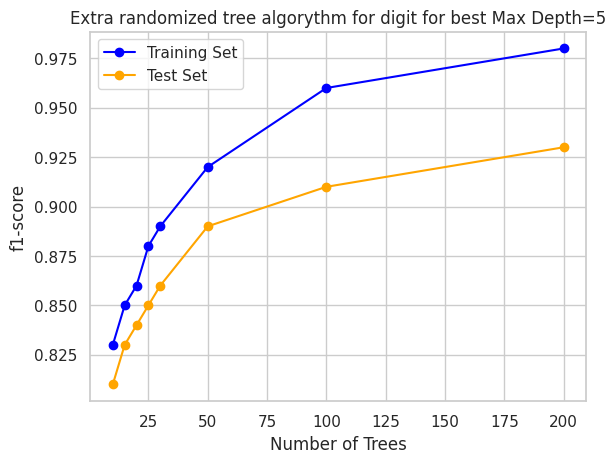

In [32]:
plot_test_vs_train_digit(df_gbt_test, df_gbt_train, max_depth_value=5, title='Extra randomized tree algorythm for digit for best Max Depth=')


# gbt WITHOUT regression and with x_vs_all and subset_vs_subset – gbt.b

In [33]:
df_uc13_gbtb_train = read_uc13_data('uc13_ensembles_gbt_train.txt')
df_uc13_gbtb_test = read_uc13_data('uc13_ensembles_gbt_test.txt')

df_uc13_gbtb_train_binary, df_uc13_gbtb_train_multiclass=split_to_binary_and_mult(df_uc13_ert_train)
df_uc13_gbtb_test_binary, df_uc13_gbtb_test_multiclass=split_to_binary_and_mult(df_uc13_ert_test)

In [34]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_gbtb_train_binary, 'Gradient boosting tree b algorythm for uc13 binary classification on train set for avarge f-score for all patients')


In [35]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_gbtb_test_binary, 'Gradient boosting tree b algorythm for uc13 binary classification on test set for avarge f-score for all patients')


In [36]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_gbtb_train_multiclass, 'Gradient boosting tree b algorythm for uc13 multi classification on train set for avarge f-score for all patients')


In [37]:
plot_uc13_3d_n_trees_max_depth_avg_f1_score(df_uc13_gbtb_test_multiclass, 'Gradient boosting tree b algorythm for uc13 multi classification on test set for avarge f-score for all patients')


# 	- gbt - WITH regression (no digits, few of patients) (link_EEG) – Ania